# Single-Task Learning on Cifar100 Dataset (100 Classes): A CNN Approach
- **Name**: Minh T. Nguyen & Peter Chen.
- **ECE 6524** - Final Project.
- **Date**: 4/18/2023.
- **Objective**: Build a Single Task CNN model using ResNet152 architecture for 100-classes image classification on Cifar100.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# import tensorflow
import tensorflow as tf
from keras.datasets import cifar100
from keras.utils import np_utils, plot_model
from keras.layers import Input, Dropout, Flatten, Dense
from keras.applications.resnet import ResNet152, preprocess_input
from keras import Model, Sequential

# 1. Data Visualization & Preprocessing

In [2]:
num_classes = 100         # number of classes
input_shape = (32, 32, 3) # original input image size

In [3]:
# download data from Keras API
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 5s 0us/step


In [4]:
# check dataset size
print(f"X={X_train.shape}, y={y_train.shape}")
print(f"X={X_test.shape}, y={y_test.shape}")

X=(50000, 32, 32, 3), y=(50000, 1)
X=(10000, 32, 32, 3), y=(10000, 1)


## 1.1. Data Visualization

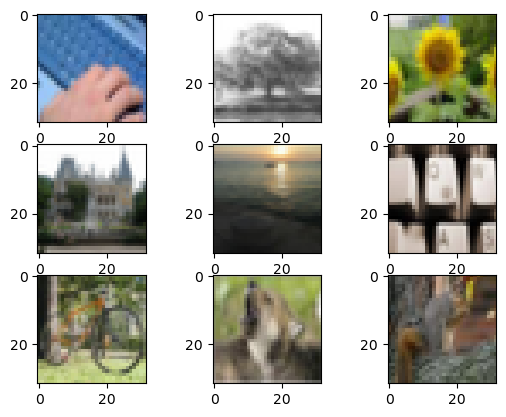

In [5]:
# plot the 9 images
f, axarr = plt.subplots(3,3)
axarr[0,0].imshow(X_train[10])
axarr[0,1].imshow(X_train[11])
axarr[0,2].imshow(X_train[12])
axarr[1,0].imshow(X_train[13])
axarr[1,1].imshow(X_train[14])
axarr[1,2].imshow(X_train[15])
axarr[2,0].imshow(X_train[16])
axarr[2,1].imshow(X_train[17])
axarr[2,2].imshow(X_train[18])
plt.show()

## 1.2. Data Preprocessing

In [6]:
# normalize input data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [7]:
# convert class into one hot encoder
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

y_train:  (50000, 100)
y_test:  (10000, 100)


# 2. Modeling
**Note**: Build a sequential model using ResNet152 architecture

In [8]:
# Define ResNet152 CNN model
def create_model(dropout):
    input_shape = (32, 32, 3)
    
    resnet152_base = ResNet152(weights=None, include_top=False, input_shape=input_shape)
    
    model = Sequential()
    
    model.add(resnet152_base)
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(100, activation='softmax'))
    
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               1

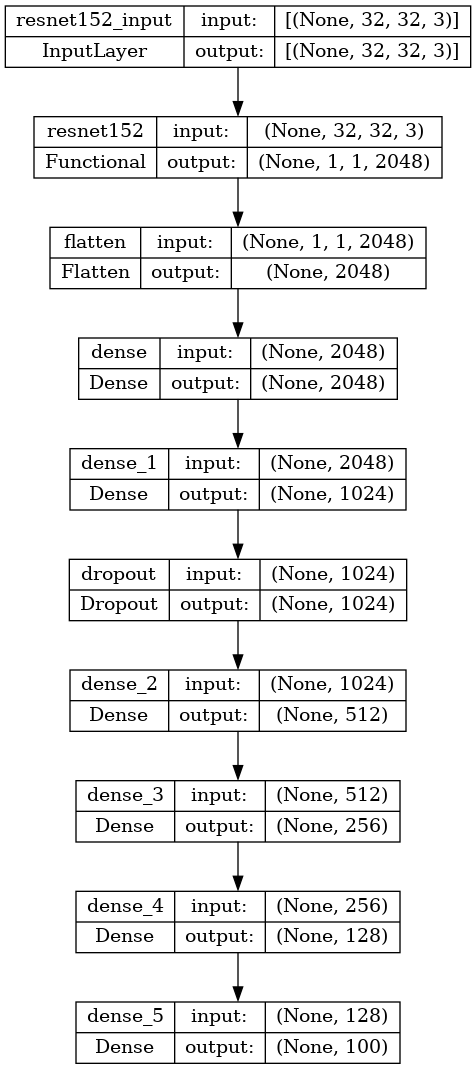

In [9]:
# display and plot model
model = create_model(0)
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
# define number of epochs
epochs = 20

# 2.1 Model 1 (Batch Size = 128, Dropout = 0, Optimizer = Adam)


In [11]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'Adam'

model_1 = create_model(dropout)

In [12]:
# compile model
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
# train model
history_1 = model_1.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 156s 148ms/step - loss: 4.4916 - accuracy: 0.0173 - val_loss: 4.3898 - val_accuracy: 0.0211
Epoch 2/20
333/333 [==============================] - 46s 138ms/step - loss: 4.2270 - accuracy: 0.0321 - val_loss: 4.2077 - val_accuracy: 0.0355
Epoch 3/20
333/333 [==============================] - 45s 136ms/step - loss: 4.0876 - accuracy: 0.0438 - val_loss: 4.2158 - val_accuracy: 0.0369
Epoch 4/20
333/333 [==============================] - 46s 137ms/step - loss: 3.9373 - accuracy: 0.0598 - val_loss: 4.0681 - val_accuracy: 0.0497
Epoch 5/20
333/333 [==============================] - 46s 137ms/step - loss: 3.8191 - accuracy: 0.0744 - val_loss: 4.1821 - val_accuracy: 0.0669
Epoch 6/20
333/333 [==============================] - 46s 137ms/step - loss: 3.6707 - accuracy: 0.0970 - val_loss: 4.1143 - val_accuracy: 0.0808
Epoch 7/20
333/333 [==============================] - 45s 136ms/step - loss: 3.5261 - accuracy: 0.1201 - val_loss: 3.6865 - val_a

In [14]:
# train model results
print('Train Loss:', history_1.history['loss'][-1])
print('Train Acc:', history_1.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_1.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 1.912483811378479
Train Acc: 0.4612235426902771

Test Loss: 2.9945080280303955
Test Acc: 0.3041999936103821


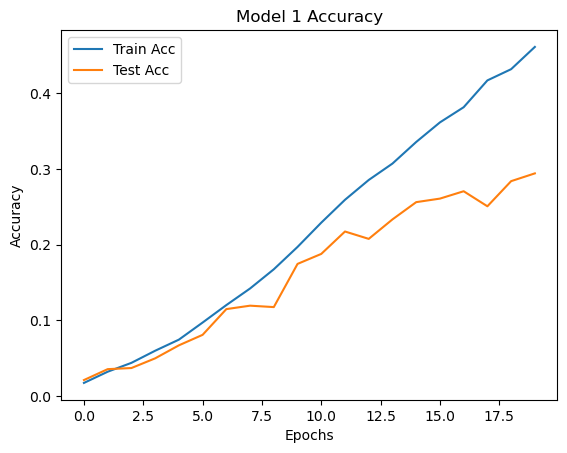

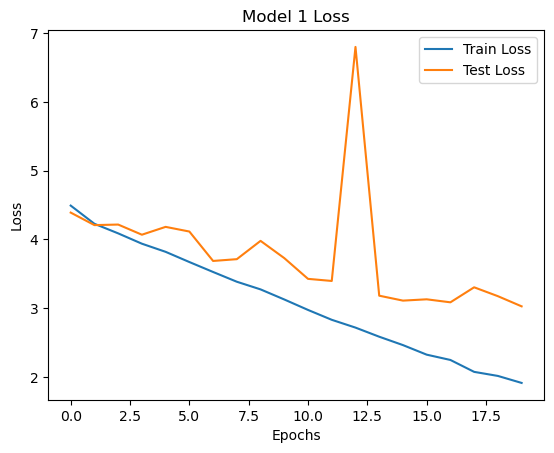

In [15]:
# Accuracy Plot
plt.plot(history_1.history['accuracy'], label='Train Acc')
plt.plot(history_1.history['val_accuracy'], label='Test Acc')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Test Loss')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.2 Model 2 (Batch Size = 64, Dropout = 0, Optimizer = Adam)

In [16]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'Adam'

model_2 = create_model(dropout)

In [17]:
# compile model
model_2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [18]:
# train model
history_2 = model_2.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 181s 125ms/step - loss: 4.4830 - accuracy: 0.0185 - val_loss: 4.6441 - val_accuracy: 0.0191
Epoch 2/20
665/665 [==============================] - 85s 129ms/step - loss: 4.1762 - accuracy: 0.0375 - val_loss: 4.4054 - val_accuracy: 0.0420
Epoch 3/20
665/665 [==============================] - 86s 130ms/step - loss: 4.0173 - accuracy: 0.0543 - val_loss: 62.5831 - val_accuracy: 0.0244
Epoch 4/20
665/665 [==============================] - 87s 131ms/step - loss: 4.0090 - accuracy: 0.0592 - val_loss: 4.4957 - val_accuracy: 0.0471
Epoch 5/20
665/665 [==============================] - 86s 129ms/step - loss: 3.7971 - accuracy: 0.0882 - val_loss: 3.7983 - val_accuracy: 0.0975
Epoch 6/20
665/665 [==============================] - 82s 123ms/step - loss: 3.7633 - accuracy: 0.0976 - val_loss: 4.0952 - val_accuracy: 0.0811
Epoch 7/20
665/665 [==============================] - 84s 127ms/step - loss: 3.5320 - accuracy: 0.1296 - val_loss: 6.7182 - val_

In [19]:
# train model results
print('Train Loss:', history_2.history['loss'][-1])
print('Train Acc:', history_2.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_2.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.404222249984741
Train Acc: 0.3533647060394287

Test Loss: 3.4432199001312256
Test Acc: 0.2281000018119812


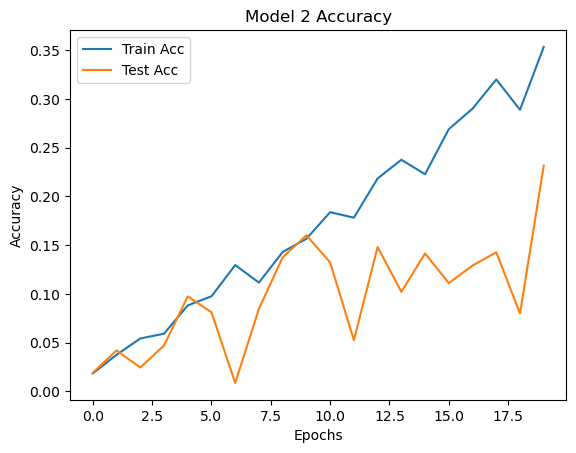

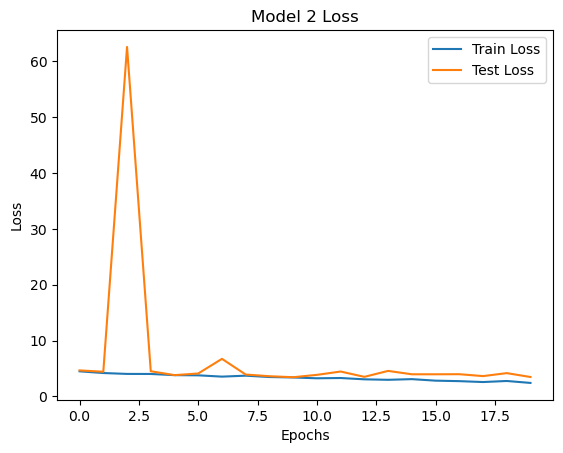

In [20]:
# Accuracy Plot
plt.plot(history_2.history['accuracy'], label='Train Acc')
plt.plot(history_2.history['val_accuracy'], label='Test Acc')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Test Loss')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.3 Model 3 (Batch Size = 64, Dropout = 0.4, Optimizer = Adam)

In [21]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'Adam'

model_3 = create_model(dropout)

In [22]:
# compile model
model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [23]:
# train model
history_3 = model_3.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 183s 128ms/step - loss: 4.4511 - accuracy: 0.0210 - val_loss: 4.3188 - val_accuracy: 0.0263
Epoch 2/20
665/665 [==============================] - 83s 124ms/step - loss: 4.1678 - accuracy: 0.0353 - val_loss: 4.1386 - val_accuracy: 0.0363
Epoch 3/20
665/665 [==============================] - 82s 124ms/step - loss: 4.0126 - accuracy: 0.0518 - val_loss: 4.0556 - val_accuracy: 0.0548
Epoch 4/20
665/665 [==============================] - 83s 125ms/step - loss: 3.8814 - accuracy: 0.0701 - val_loss: 3.8368 - val_accuracy: 0.0723
Epoch 5/20
665/665 [==============================] - 83s 125ms/step - loss: 3.7264 - accuracy: 0.0904 - val_loss: 9.4233 - val_accuracy: 0.0316
Epoch 6/20
665/665 [==============================] - 84s 126ms/step - loss: 4.0108 - accuracy: 0.0658 - val_loss: 3.8993 - val_accuracy: 0.0772
Epoch 7/20
665/665 [==============================] - 84s 127ms/step - loss: 3.7613 - accuracy: 0.0980 - val_loss: 3.7039 - val_a

In [24]:
# train model results
print('Train Loss:', history_3.history['loss'][-1])
print('Train Acc:', history_3.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_3.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.54440975189209
Train Acc: 0.32828235626220703

Test Loss: 695.1625366210938
Test Acc: 0.009600000455975533


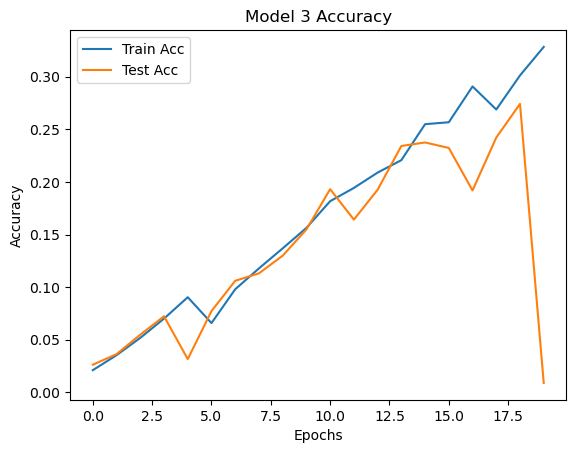

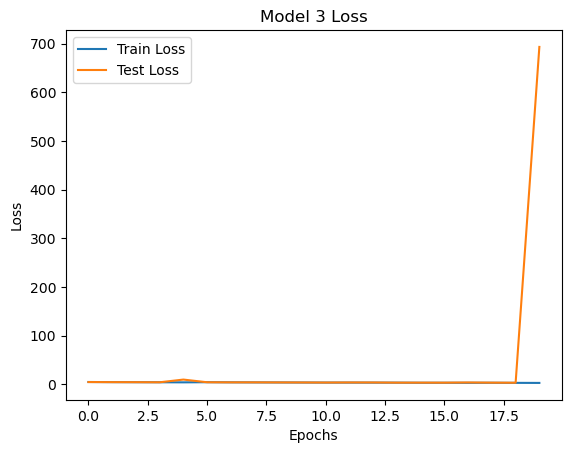

In [25]:
# Accuracy Plot
plt.plot(history_3.history['accuracy'], label='Train Acc')
plt.plot(history_3.history['val_accuracy'], label='Test Acc')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Test Loss')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.4 Model 4 (Batch Size = 128, Dropout = 0, Optimizer = SGD)

In [26]:
# define parameters and generate model
batch_size = 128
dropout = 0
optimizer = 'SGD'

model_4 = create_model(dropout)

In [27]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [28]:
# train model
history_4 = model_4.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
333/333 [==============================] - 90s 139ms/step - loss: 4.5598 - accuracy: 0.0202 - val_loss: 68271.4219 - val_accuracy: 0.0083
Epoch 2/20
333/333 [==============================] - 43s 129ms/step - loss: 4.4316 - accuracy: 0.0313 - val_loss: 316.9797 - val_accuracy: 0.0145
Epoch 3/20
333/333 [==============================] - 43s 130ms/step - loss: 4.2866 - accuracy: 0.0470 - val_loss: 6.1686 - val_accuracy: 0.0095
Epoch 4/20
333/333 [==============================] - 44s 132ms/step - loss: 4.1388 - accuracy: 0.0588 - val_loss: 220.9017 - val_accuracy: 0.0097
Epoch 5/20
333/333 [==============================] - 43s 129ms/step - loss: 4.1239 - accuracy: 0.0594 - val_loss: 6.7234 - val_accuracy: 0.0240
Epoch 6/20
333/333 [==============================] - 43s 131ms/step - loss: 3.9841 - accuracy: 0.0777 - val_loss: 8.8054 - val_accuracy: 0.0084
Epoch 7/20
333/333 [==============================] - 43s 130ms/step - loss: 3.8953 - accuracy: 0.0898 - val_loss: 4.9591 

In [29]:
# train model results
print('Train Loss:', history_4.history['loss'][-1])
print('Train Acc:', history_4.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_4.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.856419086456299
Train Acc: 0.26938822865486145

Test Loss: 7.6832475662231445
Test Acc: 0.03480000048875809


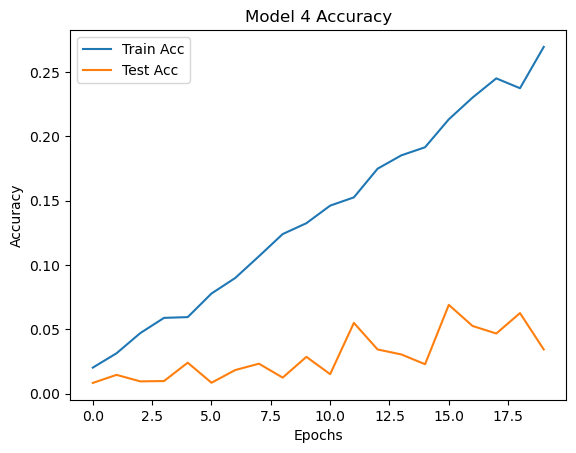

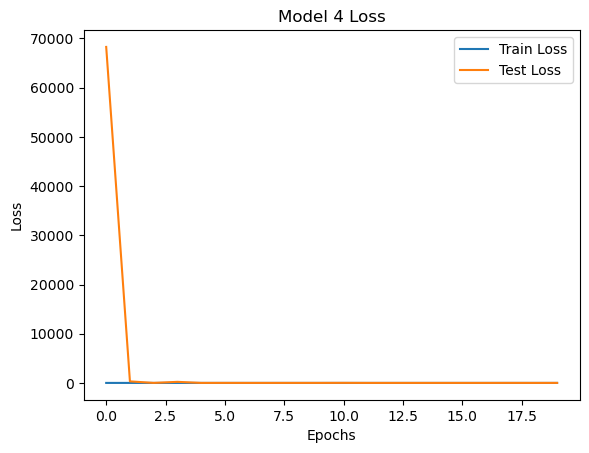

In [30]:
# Accuracy Plot
plt.plot(history_4.history['accuracy'], label='Train Acc')
plt.plot(history_4.history['val_accuracy'], label='Test Acc')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_4.history['loss'], label='Train Loss')
plt.plot(history_4.history['val_loss'], label='Test Loss')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.5 Model 5 (Batch Size = 64, Dropout = 0, Optimizer = SGD)

In [31]:
# define parameters and generate model
batch_size = 64
dropout = 0
optimizer = 'SGD'

model_5 = create_model(dropout)

In [32]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
# train model
history_5 = model_5.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 122s 121ms/step - loss: 4.5413 - accuracy: 0.0223 - val_loss: 562370183168.0000 - val_accuracy: 0.0093
Epoch 2/20
665/665 [==============================] - 77s 116ms/step - loss: 4.3104 - accuracy: 0.0413 - val_loss: 4.7482 - val_accuracy: 0.0139
Epoch 3/20
665/665 [==============================] - 78s 117ms/step - loss: 4.0760 - accuracy: 0.0663 - val_loss: 5.0687 - val_accuracy: 0.0157
Epoch 4/20
665/665 [==============================] - 78s 117ms/step - loss: 3.9492 - accuracy: 0.0847 - val_loss: 4.8034 - val_accuracy: 0.0156
Epoch 5/20
665/665 [==============================] - 77s 116ms/step - loss: 3.8439 - accuracy: 0.0991 - val_loss: 4.6485 - val_accuracy: 0.0171
Epoch 6/20
665/665 [==============================] - 78s 118ms/step - loss: 3.8096 - accuracy: 0.1095 - val_loss: 143.6169 - val_accuracy: 0.0105
Epoch 7/20
665/665 [==============================] - 77s 116ms/step - loss: 3.8739 - accuracy: 0.0992 - val_loss: 4

In [34]:
# train model results
print('Train Loss:', history_5.history['loss'][-1])
print('Train Acc:', history_5.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_5.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.9402284622192383
Train Acc: 0.2608470618724823

Test Loss: 4.522232532501221
Test Acc: 0.0803999975323677


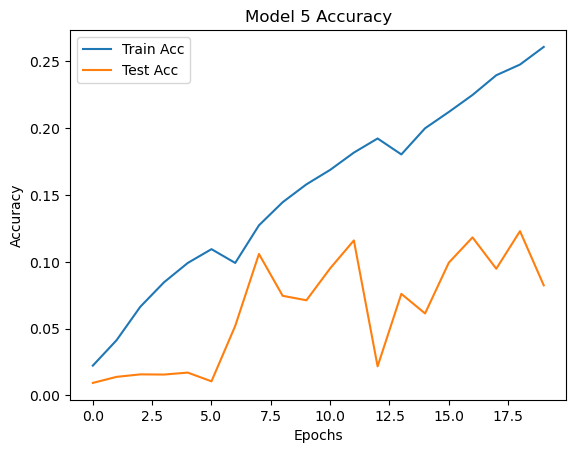

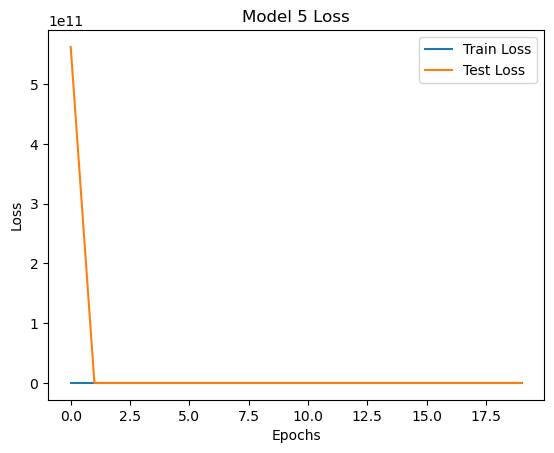

In [35]:
# Accuracy Plot
plt.plot(history_5.history['accuracy'], label='Train Acc')
plt.plot(history_5.history['val_accuracy'], label='Test Acc')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_5.history['loss'], label='Train Loss')
plt.plot(history_5.history['val_loss'], label='Test Loss')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 2.6 Model 6 (Batch Size = 64, Dropout = 0.4, Optimizer = SGD)

In [36]:
# define parameters and generate model
batch_size = 64
dropout = 0.4
optimizer = 'SGD'

model_6 = create_model(dropout)

In [37]:
# compile model
model_6.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [38]:
# train model
history_6 = model_6.fit(X_train, y_train, validation_split=0.15, 
            batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/20
665/665 [==============================] - 124s 125ms/step - loss: 4.5904 - accuracy: 0.0135 - val_loss: 17.3567 - val_accuracy: 0.0124
Epoch 2/20
665/665 [==============================] - 78s 117ms/step - loss: 4.5281 - accuracy: 0.0242 - val_loss: 6.5126 - val_accuracy: 0.0109
Epoch 3/20
665/665 [==============================] - 79s 118ms/step - loss: 4.3242 - accuracy: 0.0392 - val_loss: 6.7147 - val_accuracy: 0.0205
Epoch 4/20
665/665 [==============================] - 78s 117ms/step - loss: 4.1786 - accuracy: 0.0495 - val_loss: 4.3865 - val_accuracy: 0.0305
Epoch 5/20
665/665 [==============================] - 79s 119ms/step - loss: 4.0224 - accuracy: 0.0691 - val_loss: 4.6519 - val_accuracy: 0.0272
Epoch 6/20
665/665 [==============================] - 78s 118ms/step - loss: 3.9301 - accuracy: 0.0819 - val_loss: 4.3912 - val_accuracy: 0.0473
Epoch 7/20
665/665 [==============================] - 78s 117ms/step - loss: 3.8008 - accuracy: 0.0993 - val_loss: 4.1945 - val_

In [39]:
# train model results
print('Train Loss:', history_6.history['loss'][-1])
print('Train Acc:', history_6.history['accuracy'][-1])


# validation results
val_loss, val_acc = model_6.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', val_loss)
print('Test Acc:', val_acc)

Train Loss: 2.6737685203552246
Train Acc: 0.30063530802726746

Test Loss: 4.101789474487305
Test Acc: 0.1412999927997589


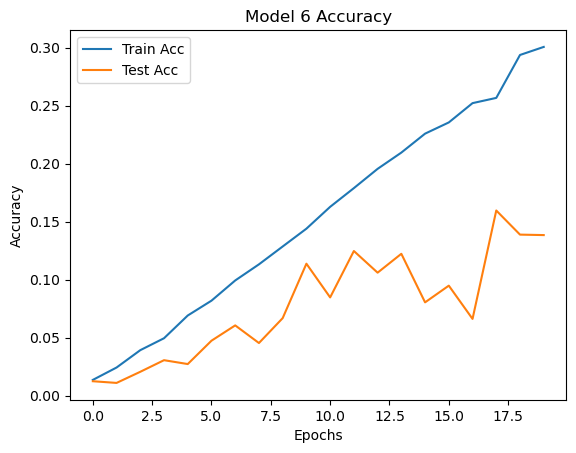

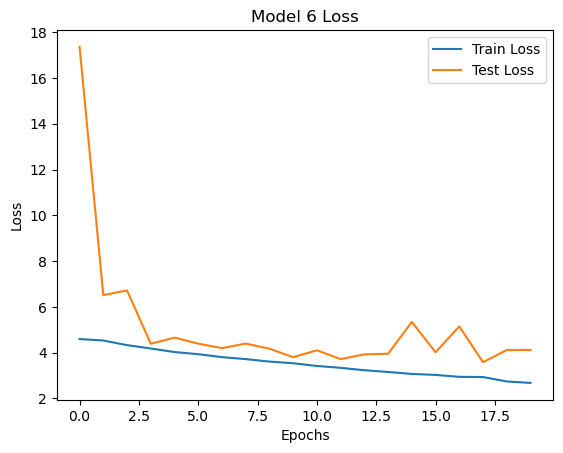

In [40]:
# Accuracy Plot
plt.plot(history_6.history['accuracy'], label='Train Acc')
plt.plot(history_6.history['val_accuracy'], label='Test Acc')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history_6.history['loss'], label='Train Loss')
plt.plot(history_6.history['val_loss'], label='Test Loss')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()